In [1]:
import pandas as pd

df = pd.read_csv('/content/weather.csv')#https://archive.ics.uci.edu/dataset/43/haberman+s+survival
df

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-12,0.0,12.8,5.0,4.7,drizzle
1,02-01-12,10.9,10.6,2.8,4.5,rain
2,03-01-12,0.8,11.7,7.2,2.3,rain
3,04-01-12,20.3,12.2,5.6,4.7,rain
4,05-01-12,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-15,8.6,4.4,1.7,2.9,rain
1457,28-12-15,1.5,5.0,1.7,1.3,rain
1458,29-12-15,0.0,7.2,0.6,2.6,fog
1459,30-12-15,0.0,5.6,-1.0,3.4,sun


In [2]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
df.drop('date',axis=1, inplace=True)
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [7]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


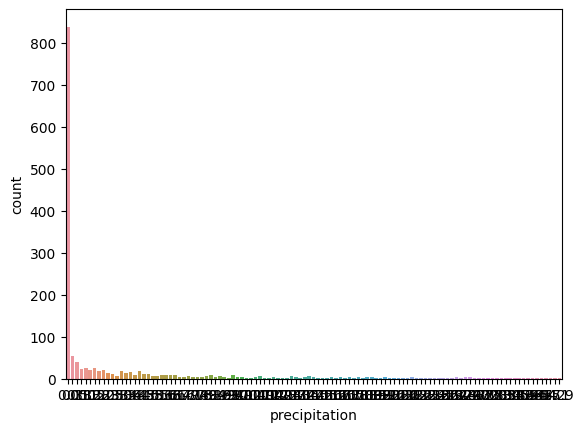

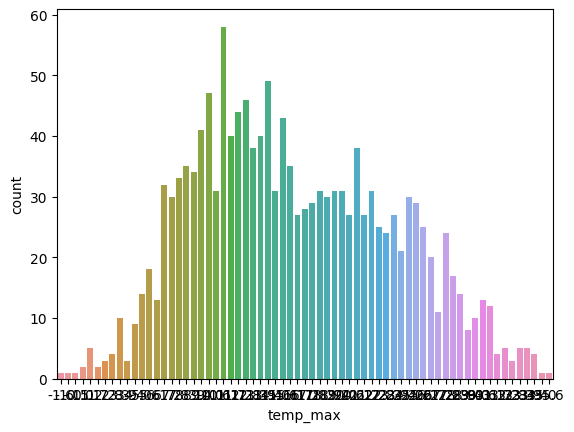

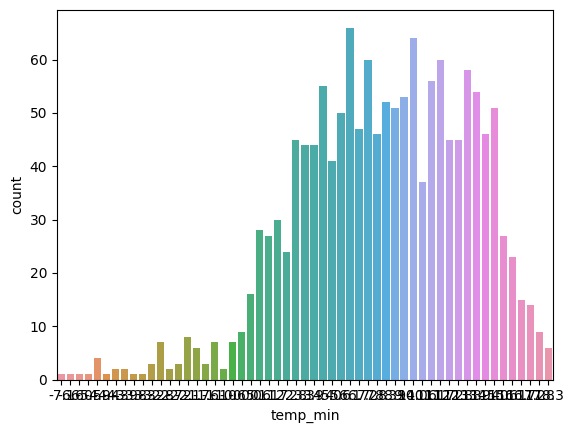

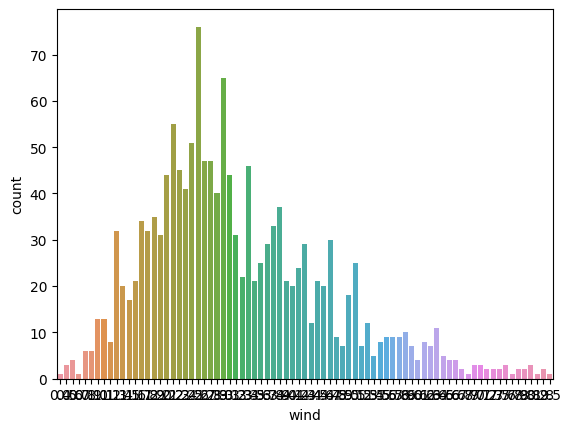

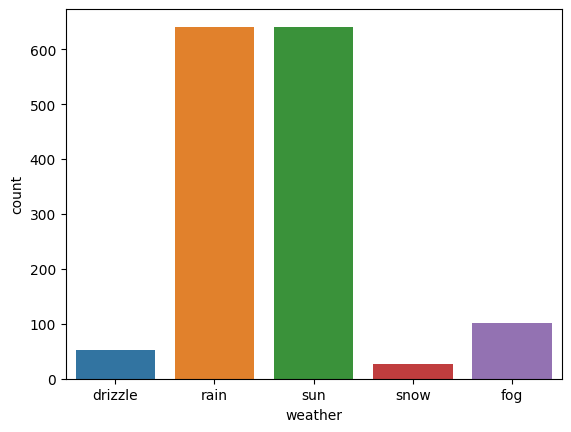

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    ax = sns.countplot(x=df[i],data=df)
    plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
# for i in df.columns:
#   if df[i].dtype == object:
#     df[i] = LabelEncoder().fit_transform(df[i])
# df

lb1 = LabelEncoder()
df['weather'] = lb1.fit_transform(df['weather'])
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [10]:
df.describe()

,precipitation,temp_max,temp_min,wind,weather
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,2.752225
std,6.680194,7.349758,5.023004,1.437825,1.191380
min,0.000000,-1.600000,-7.100000,0.400000,0.000000
25%,0.000000,10.600000,4.400000,2.200000,2.000000
50%,0.000000,15.600000,8.300000,3.000000,2.000000
75%,2.800000,22.200000,12.200000,4.000000,4.000000
max,55.900000,35.600000,18.300000,9.500000,4.000000


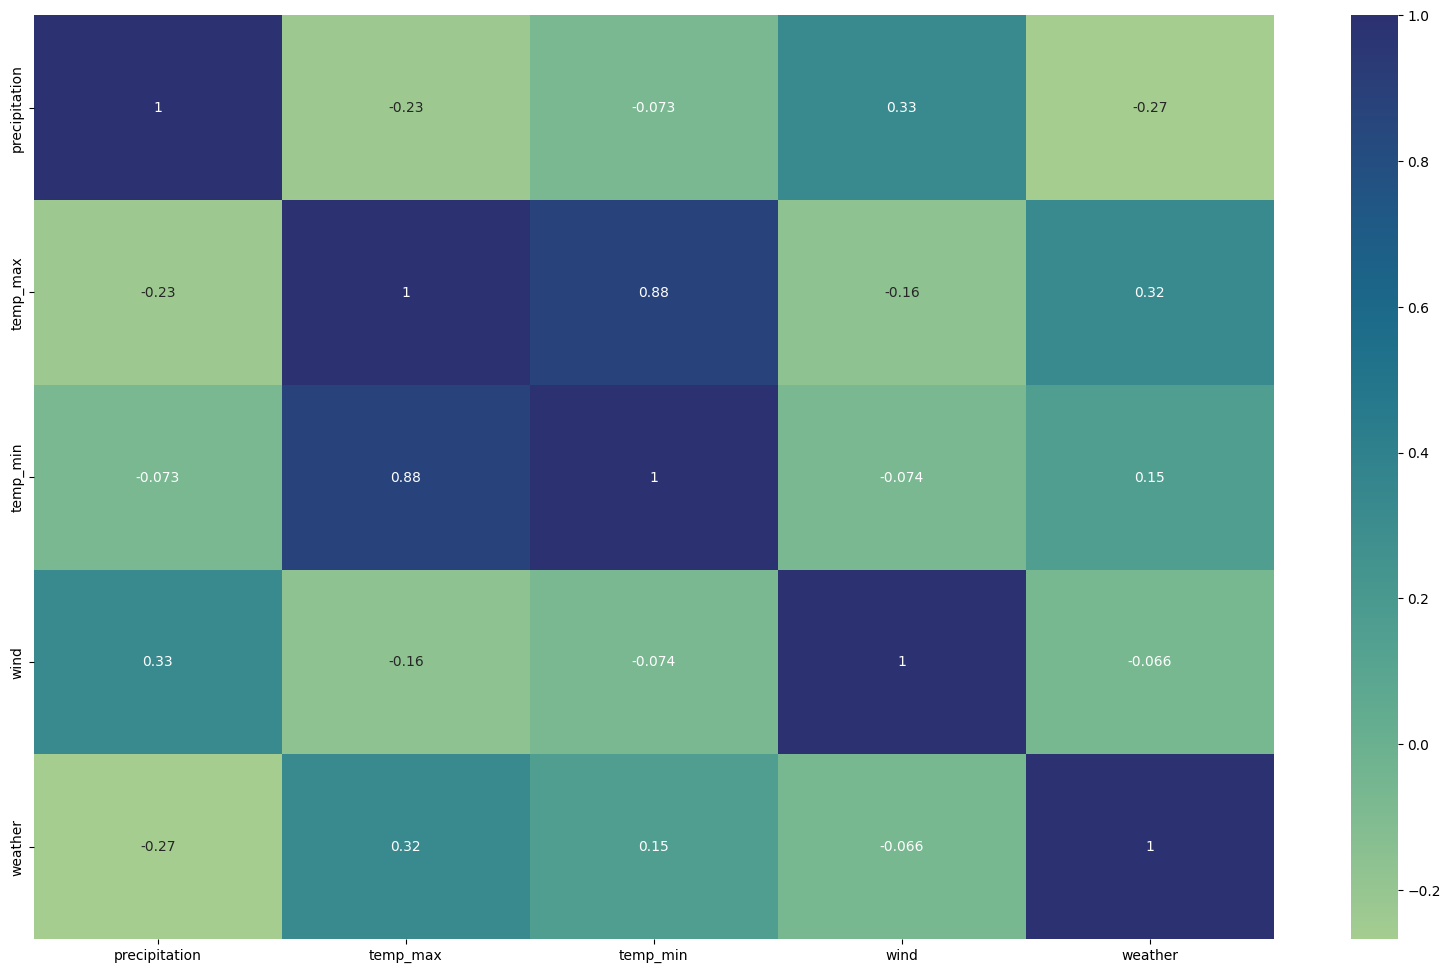

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap = 'crest', annot = True)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
x = df.drop(['weather','precipitation','temp_max','temp_min'],axis = 1) #Features
y = df['weather'] #Target

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size= 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1168, 1)
(1168,)
(293, 1)
(293,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = []
for neighbors in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors = neighbors)
    knn_model.fit(x_train, y_train)

    knn_pred = knn_model.predict(x_test)
    accuracy.append(accuracy_score(y_test, knn_pred))
    print(f'Number of neighbors = {neighbors} \tAccuracy = {accuracy[neighbors-1]*100:.2f} %')

Number of neighbors = 1 	Accuracy = 40.61 %
Number of neighbors = 2 	Accuracy = 34.47 %
Number of neighbors = 3 	Accuracy = 39.59 %
Number of neighbors = 4 	Accuracy = 37.88 %
Number of neighbors = 5 	Accuracy = 39.93 %
Number of neighbors = 6 	Accuracy = 40.96 %
Number of neighbors = 7 	Accuracy = 41.30 %
Number of neighbors = 8 	Accuracy = 42.66 %
Number of neighbors = 9 	Accuracy = 46.76 %
Number of neighbors = 10 	Accuracy = 45.73 %
Number of neighbors = 11 	Accuracy = 48.81 %
Number of neighbors = 12 	Accuracy = 49.83 %
Number of neighbors = 13 	Accuracy = 49.15 %
Number of neighbors = 14 	Accuracy = 50.51 %
Number of neighbors = 15 	Accuracy = 47.44 %
Number of neighbors = 16 	Accuracy = 50.51 %
Number of neighbors = 17 	Accuracy = 49.15 %
Number of neighbors = 18 	Accuracy = 50.51 %
Number of neighbors = 19 	Accuracy = 49.83 %
Number of neighbors = 20 	Accuracy = 49.15 %


ValueError: ignored

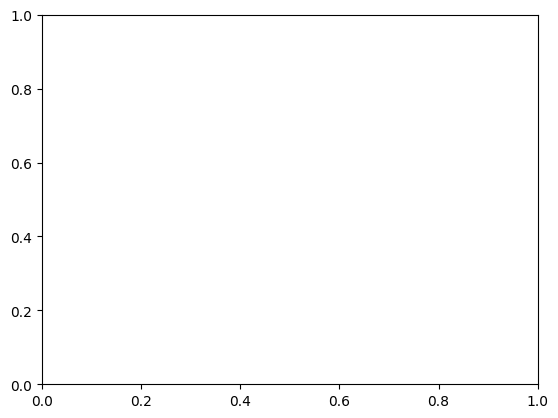

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(range(1,11), accuracy, label = 'Accuracy', color = 'red', lw = 4)
plt.title('Plotting the Accuracy scores for KNN model with \'n\' neighbors')
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy')

In [48]:
clf1 = KNeighborsClassifier(n_neighbors = 6,p=1)#manhattan

In [49]:
print(x_train)

      wind
1066   5.7
638    6.3
799    2.2
380    2.3
303    2.8
...    ...
1130   1.7
1294   3.4
860    2.1
1459   3.4
1126   1.9

[1168 rows x 1 columns]


In [50]:
clf1.fit (x_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [51]:
pred1 = clf1.predict(x_test)

In [52]:
cm1 = confusion_matrix(y_test,pred1)

In [53]:
print(cm1)

[[ 0  0  4  0  5]
 [ 3  2 12  0  8]
 [ 5  3 88  0 24]
 [ 0  0  7  0  1]
 [ 5  0 94  2 30]]


In [54]:
cl1 = classification_report(y_test,pred1)

In [55]:
print(cl1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.40      0.08      0.13        25
           2       0.43      0.73      0.54       120
           3       0.00      0.00      0.00         8
           4       0.44      0.23      0.30       131

    accuracy                           0.41       293
   macro avg       0.25      0.21      0.20       293
weighted avg       0.41      0.41      0.37       293



##  Naive Bayes

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

clf1 = MultinomialNB()
clf2 = BernoulliNB()

In [69]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

BernoulliNB()

In [58]:
pred1 = clf1.predict(x_test)
pred2 = clf2.predict(x_test)

In [59]:
cm1 = confusion_matrix(y_test,pred1)
cr1 = classification_report(y_test,pred1)

cm2 = confusion_matrix(y_test,pred2)
cr2 = classification_report(y_test,pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

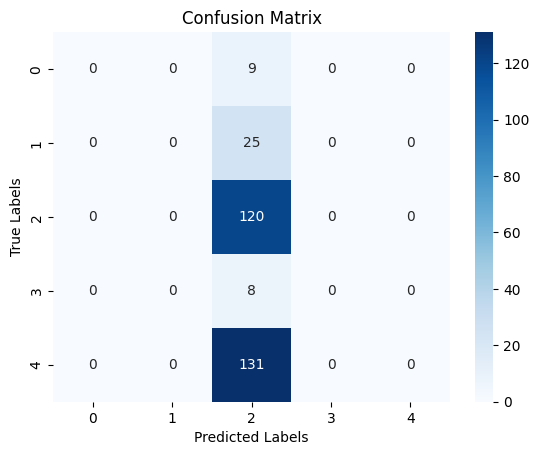

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [61]:
print(cr1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.41      1.00      0.58       120
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00       131

    accuracy                           0.41       293
   macro avg       0.08      0.20      0.12       293
weighted avg       0.17      0.41      0.24       293



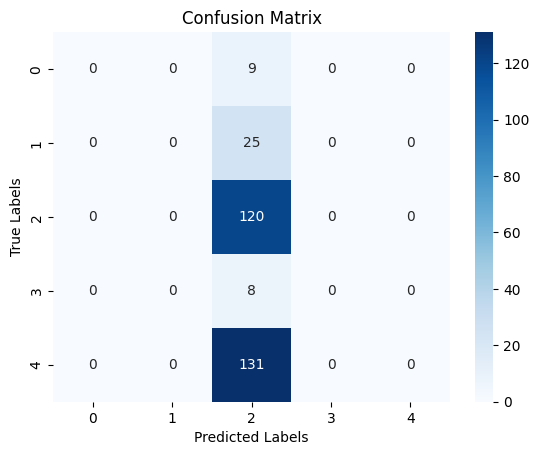

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [63]:
print(cr2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.41      1.00      0.58       120
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00       131

    accuracy                           0.41       293
   macro avg       0.08      0.20      0.12       293
weighted avg       0.17      0.41      0.24       293



In [73]:
from sklearn.metrics import accuracy_score #works

prior1 = [x/100 for x in range(60,150,5)]
prior2 = [x/100 for x in range(60,150,5)]
best_accuracy = 0.0

best_val1 = None
best_val2 = None

for val2 in prior2:
    for val1 in prior1:
        clf = BernoulliNB(class_prior=[val1, val2])
        clf.fit(y_train, y_train)

        y_pred = clf.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_val1 = val1
            best_val2 = val2

print("Best Accuracy:", best_accuracy)
print("Best val1:", best_val1)
print("Best val2:", best_val2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [66]:
clf3 = MultinomialNB(class_prior = [1,1.2])
clf4 = BernoulliNB(class_prior = [1,1.2])

In [67]:
clf3.fit(x_train,y_train)
clf4.fit(x_train,y_train)

pred3 = clf3.predict(x_test)
pred4 = clf4.predict(x_test)

cm3 = confusion_matrix(y_test,pred3)
cr3 = classification_report(y_test,pred3)

cm4 = confusion_matrix(y_test,pred4)
cr4 = classification_report(y_test,pred4)

ValueError: ignored

In [ ]:
print(cr3)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [ ]:
print(cr4)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



## SVM Model

In [74]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.54      0.55      0.55       120
           3       0.00      0.00      0.00         8
           4       0.49      0.64      0.56       131

    accuracy                           0.51       293
   macro avg       0.21      0.24      0.22       293
weighted avg       0.44      0.51      0.47       293



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

In [75]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [x/100 for x in range(10,200,5)],
    'max_iter': [x for x in range(1000,5000,1000)],
    'penalty': ['l1','l2']
    #random_state : [x for x in range(1,100)]
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
760 fits failed out of a total of 1520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, pena

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validation scores: [0.51194539 0.57191781 0.56164384 0.5        0.49657534]
Mean score: 0.5284164757585674


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Decision Tree

In [77]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [78]:
# use the model to make predictions with the test data
y_pred = dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))



Misclassified samples: 138
Accuracy: 0.53


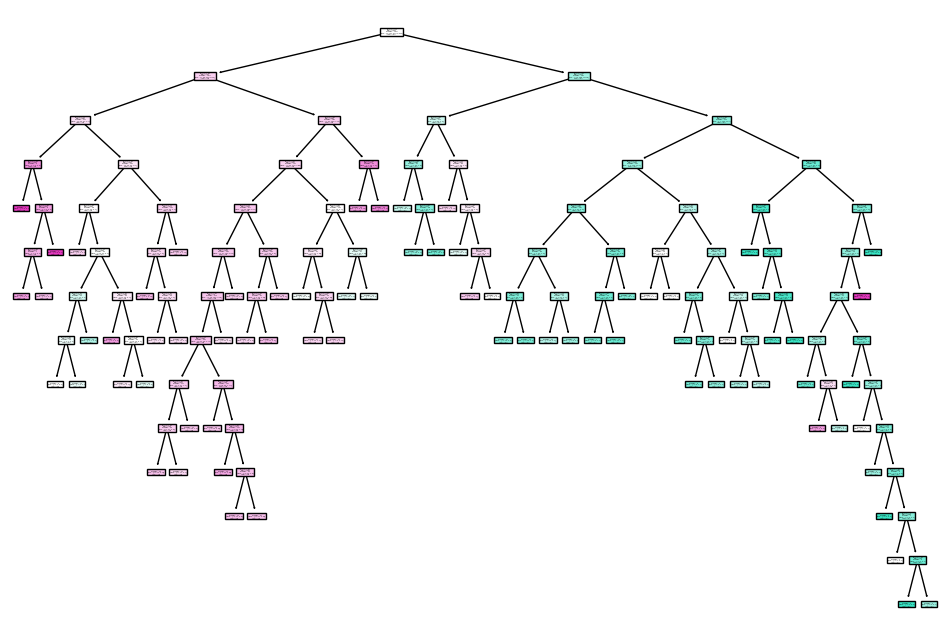

In [80]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming you have your data in 'x' (features) and 'y' (target/labels)

# Create an instance of the DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(x, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names=[str(x) for x in list(lb1.classes_)], filled=True)
plt.show()
